In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
# sns.set()



In [23]:
raw_data= pd.read_excel("CoffeeShop.xlsx", "orders")
raw_data

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out
0,1,ORD001,2024-02-12 07:04:00,It008,1,Alex,out
1,2,ORD002,2024-02-12 07:09:00,It014,1,Jordan,in
2,3,ORD003,2024-02-12 07:14:00,It008,1,Taylor,out
3,4,ORD004,2024-02-12 07:18:00,It019,1,Casey,out
4,5,ORD005,2024-02-12 07:23:00,It024,1,Jamie,out
...,...,...,...,...,...,...,...
516,517,ORD433,2024-02-17 16:11:00,It023,1,Gina,in
517,518,ORD434,2024-02-17 16:27:00,It006,1,Hugh,out
518,519,ORD435,2024-02-17 16:43:00,It018,1,Iris,in
519,520,ORD436,2024-02-17 16:59:00,It002,1,Jack,out


In [24]:
# Display the number of missing values per column
print(raw_data.isnull().sum())

row_id         0
order_id       0
created_at     0
item_id        0
quantity       0
cust_name      0
in_or_out     32
dtype: int64


In [25]:
# no missing values in date and time
data=raw_data.copy()
data['created_at']= pd.to_datetime(data['created_at'])
data

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out
0,1,ORD001,2024-02-12 07:04:00,It008,1,Alex,out
1,2,ORD002,2024-02-12 07:09:00,It014,1,Jordan,in
2,3,ORD003,2024-02-12 07:14:00,It008,1,Taylor,out
3,4,ORD004,2024-02-12 07:18:00,It019,1,Casey,out
4,5,ORD005,2024-02-12 07:23:00,It024,1,Jamie,out
...,...,...,...,...,...,...,...
516,517,ORD433,2024-02-17 16:11:00,It023,1,Gina,in
517,518,ORD434,2024-02-17 16:27:00,It006,1,Hugh,out
518,519,ORD435,2024-02-17 16:43:00,It018,1,Iris,in
519,520,ORD436,2024-02-17 16:59:00,It002,1,Jack,out


In [26]:
data['created_at_hour']=data['created_at'].dt.hour
data

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out,created_at_hour
0,1,ORD001,2024-02-12 07:04:00,It008,1,Alex,out,7
1,2,ORD002,2024-02-12 07:09:00,It014,1,Jordan,in,7
2,3,ORD003,2024-02-12 07:14:00,It008,1,Taylor,out,7
3,4,ORD004,2024-02-12 07:18:00,It019,1,Casey,out,7
4,5,ORD005,2024-02-12 07:23:00,It024,1,Jamie,out,7
...,...,...,...,...,...,...,...,...
516,517,ORD433,2024-02-17 16:11:00,It023,1,Gina,in,16
517,518,ORD434,2024-02-17 16:27:00,It006,1,Hugh,out,16
518,519,ORD435,2024-02-17 16:43:00,It018,1,Iris,in,16
519,520,ORD436,2024-02-17 16:59:00,It002,1,Jack,out,16


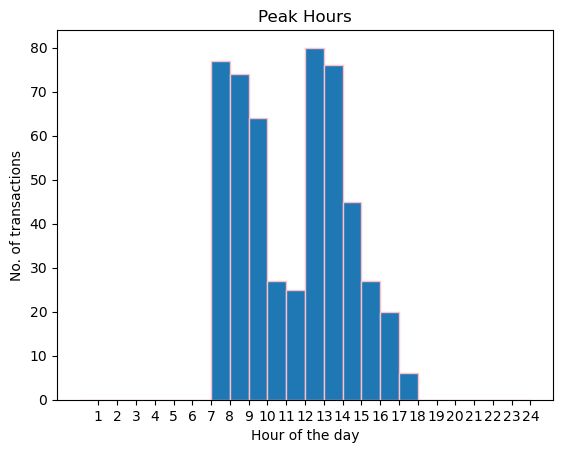

In [27]:
plt.hist(data['created_at_hour'], bins=24, range=(0, 24),edgecolor='pink')
plt.xlabel("Hour of the day")
plt.xticks(np.arange(1, 25, 1))
plt.ylabel("No. of transactions")
plt.title("Peak Hours")
plt.show()
# print(type(plt.xlabel))

#### Peak hours are in the morning 7-8 and in the afternoon 12 to 2

In [37]:
price_data = pd.read_excel("CoffeeShop.xlsx", 'items')
merged_data = pd.merge(price_data, data,on='item_id')
new_data = merged_data[["order_id","item_id"," item_price ","created_at_hour"]]
new_data[' item_price '] = new_data[' item_price '].replace({'£': ''}, regex=True).astype(float)
# print(new_data)


# Define peak hours
peak_hours = [7,12,13]

# Filter data for peak hours
peak_hour_sales = new_data[new_data['created_at_hour'].isin(peak_hours)]

# Calculate total sales during peak hours
total_sales_peak_hours = peak_hour_sales[" item_price "].sum()
# print(total_sales_peak_hours)

# Calculate total sales overall
total_sales_overall = new_data[" item_price "].sum()
# print(total_sales_overall)

# Calculate the percentage of sales during peak hours
percentage_peak_hour_sales = (total_sales_peak_hours / total_sales_overall) * 100

print(f"Percentage of total sales during peak hours: {percentage_peak_hour_sales:.2f}%")


Percentage of total sales during peak hours: 45.72%


C:\Users\Sakshi Srivastava\AppData\Local\Temp\ipykernel_26460\2632444635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[' item_price '] = new_data[' item_price '].replace({'£': ''}, regex=True).astype(float)


Percentage of total sales during peak hours: 45.72%